In [6]:
%matplotlib inline
import pandas as pd
import sqlalchemy

%reload_ext sql

engine = sqlalchemy.create_engine('postgresql://millbr02:@localhost/movies')



/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/usr/local/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [8]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [63]:
release_date = pd.read_sql('release_date', engine)
release_date.head()

,title,year,country,date,month,day,dow
0,Meteor,1979,Japan,1979-10-27,10,27,5
1,Meteor,1979,Norway,1979-11-27,11,27,1
2,Meteor,1979,Spain,1979-12-01,12,1,5
3,Meteor,1979,Australia,1979-12-20,12,20,3
4,Meteor,1979,Finland,1979-12-21,12,21,4


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

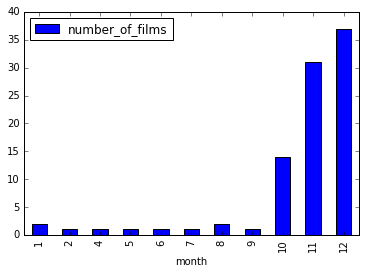

In [24]:
xmas_usa_movies = release_date[(release_date.title.str.contains('Christmas')) & (release_date.country == 'USA')]
xmas_usa_movies = xmas_usa_movies.groupby('month').size().reset_index(name='number_of_films')
xmas_usa_movies.plot(x='month', y='number_of_films', kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

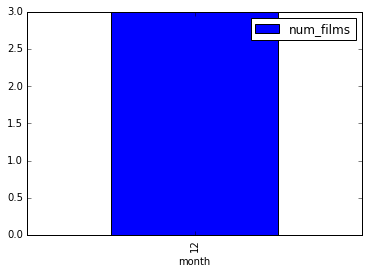

In [23]:
hobbit_usa_movies = release_date[(release_date.title.str.startswith('The Hobbit')) & (release_date.country == 'USA')]
hobbit_usa_movies.groupby('month').size().reset_index(name='num_films').plot(x='month', y='num_films', kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


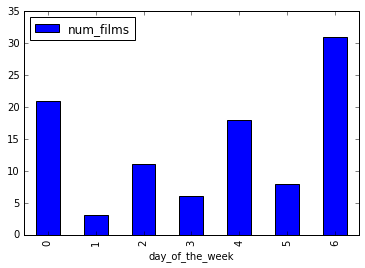

In [36]:
romance_usa_films = release_date[(release_date.title.str.contains('Romance')) & (release_date.country == 'USA')]
romance_usa_films['day_of_the_week'] = romance_usa_films['dow']
romance_usa_films.groupby('day_of_the_week').size().reset_index(name='num_films').plot(x='day_of_the_week', y='num_films', kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


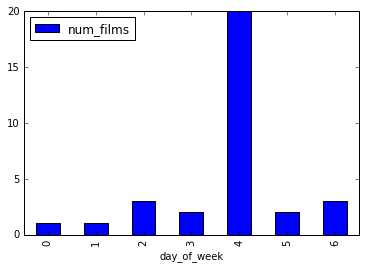

In [37]:
action_films = release_date[(release_date.title.str.contains('Action') & (release_date.country == 'USA'))]
action_films['day_of_week'] = action_films['dow']
action_films.groupby('day_of_week').size().reset_index(name='num_films').plot(x='day_of_week',y='num_films',kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [52]:
dench_films = cast[(cast.year >= 1990) & (cast.year <= 1999) & (cast.name == 'Judi Dench')]
usa_films_1990s = release_date[(release_date.year >= 1990) & (release_date.year <= 1999) & (release_date.country =='USA')]
dench_films_dates_usa = pd.merge(dench_films, usa_films_1990s, left_on='title', right_on='title')
dench_films_dates_usa[['title', 'date', 'name', 'character']]

,title,date,name,character
0,GoldenEye,1995-11-17,Judi Dench,M
1,Hamlet,1991-01-18,Judi Dench,Hecuba
2,Hamlet,1996-12-25,Judi Dench,Hecuba
3,Jack & Sarah,1996-03-22,Judi Dench,Margaret
4,Mrs Brown,1997-07-18,Judi Dench,Queen Victoria
5,Shakespeare in Love,1999-01-08,Judi Dench,Queen Elizabeth
6,Tea with Mussolini,1999-05-14,Judi Dench,Arabella
7,The World Is Not Enough,1999-11-19,Judi Dench,M
8,Tomorrow Never Dies,1997-12-19,Judi Dench,M


### In which months do films with Judi Dench tend to be released in the USA?

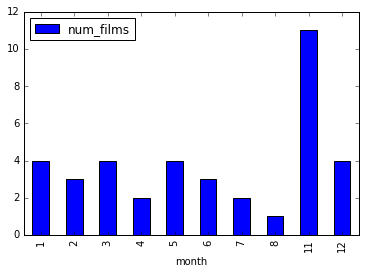

In [59]:
dench_films = cast[cast.name == 'Judi Dench']
usa_films = release_date[release_date.country == 'USA']
dench_films_months = pd.merge(dench_films, usa_films, left_on= ['title', 'year'], right_on = ['title','year'])
dench_films_months.groupby('month').size().reset_index(name='num_films').plot(x='month',y='num_films',kind='bar')
#Overwhelmingly November.

### In which months do films with Tom Cruise tend to be released in the USA?

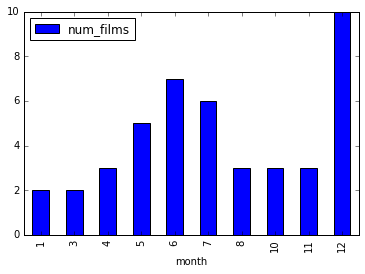

In [60]:
cruise_films = cast[cast.name == 'Tom Cruise']
usa_films = release_date[release_date.country == 'USA']
cruise_films_months = pd.merge(cruise_films, usa_films, left_on= ['title', 'year'], right_on = ['title','year'])
cruise_films_months.groupby('month').size().reset_index(name='num_films').plot(x='month',y='num_films',kind='bar')
#I'd say June, July, and December